## A logistics company recorded the time taken for delivery and the time taken for the sorting of the items for delivery. Build a Simple Linear Regression model to find the relationship between delivery time and sorting time with delivery time as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

## Importing necessary libraries

In [3]:

import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\yavar\DS_Assignments\22.Simple Linear Regression\delivery_time.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df.rename(columns={'Delivery Time':'dt','Sorting Time':'st'}, inplace=True)

In [8]:
df.isnull().sum()

dt    0
st    0
dtype: int64

## Box plot, Scatter plot and Skewness

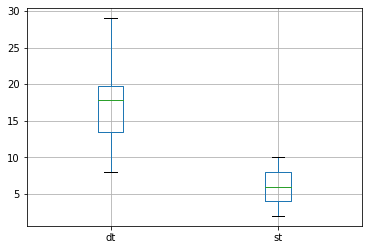

In [9]:
df.boxplot();

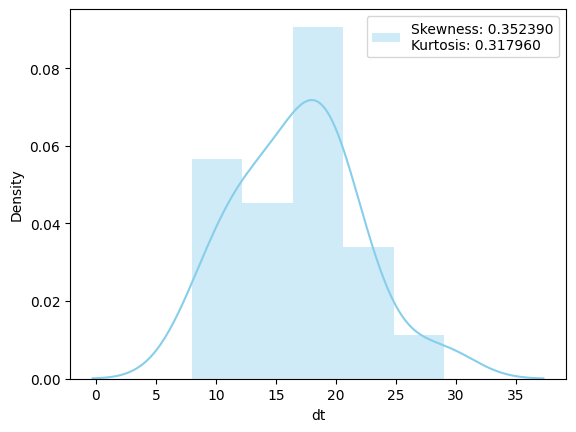

In [10]:
sns.distplot( df['dt'] , color="skyblue",label = "Skewness: %f" % df['dt'].skew() + "\n" + "Kurtosis: %f" % df['dt'].kurt())
plt.legend();

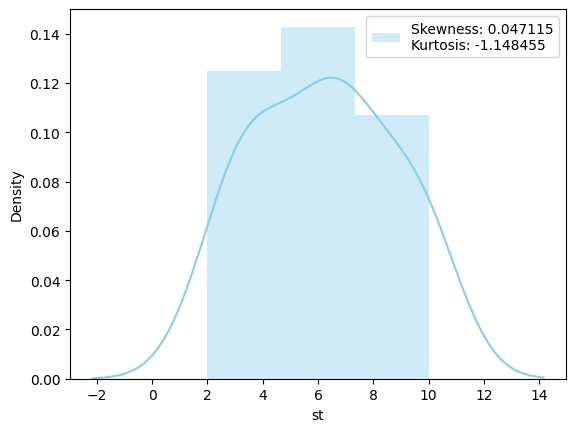

In [11]:
sns.distplot( df['st'] , color="skyblue",label = "Skewness: %f" % df['st'].skew() + "\n" + "Kurtosis: %f" % df['st'].kurt())
plt.legend();


In [12]:
corre = np.corrcoef(df['dt'],df['st'])
print(corre)

[[1.         0.82599726]
 [0.82599726 1.        ]]


In [13]:
cov = np.cov(df['dt'],df['st'])
print(cov)

[[25.75461905 10.65580952]
 [10.65580952  6.46190476]]


# Simple Linear Regression 

In [14]:
x=np.array(df.dt).reshape(-1,1)
y=np.array(df.st).reshape(-1,1)

In [15]:
model = LinearRegression()
model.fit(x,y)

print(model.score(x, y))

0.682271474841723


In [16]:
pred1= model.predict(pd.DataFrame(df['dt']))

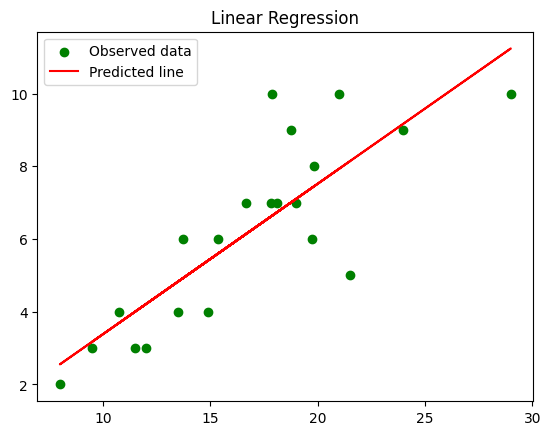

In [17]:
# plt.scatter(df['dt'],df['st']);
plt.scatter(x,y, color = 'green')
plt.plot(df.dt,pred1,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [18]:
regression_model_mse = mean_squared_error(x,y)

MSE = math.sqrt(regression_model_mse)
print("MSE             : ", MSE)
Rsqr = model.score(x,y)
print("R squared value :",Rsqr)

MSE             :  11.079517997079975
R squared value : 0.682271474841723


In [19]:
print("Coefficient b0 :",model.coef_[0])
print("Intercept b1   :",model.intercept_[0])

Coefficient b0 : [0.41374363]
Intercept b1   : -0.7566733660351268


In [20]:
y_predicted = model.predict(x)
y_actual = y
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                           #get the ^

print(rmse(y_predicted,y_actual))

1.398343056795723


In [21]:
import statsmodels.formula.api as smf

model = smf.ols('st ~ dt',data = df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     st   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        22:48:20   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
dt             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applied log for x variable


In [22]:
df['dt']

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: dt, dtype: float64

In [23]:
df["dt_log"]=np.log(df['dt'])

In [24]:
model2 = smf.ols("st~dt_log",data= df).fit()

model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     st   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                        22:48:20   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
dt_log         6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
corre = np.corrcoef(df['dt_log'],df['st'])
print(corre)

[[1.         0.84317726]
 [0.84317726 1.        ]]


In [26]:
pred2= model2.predict(df['dt_log'])

In [27]:
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

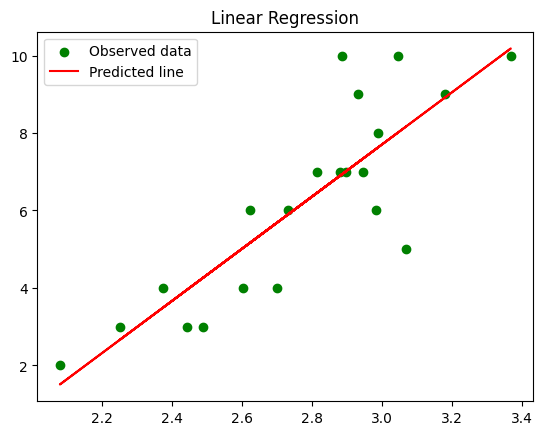

In [30]:

plt.scatter(df.dt_log,y, color = 'green')
plt.plot(df.dt_log,pred2,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [31]:
model2 = smf.ols("st~np.log(df['dt'])",data= df).fit()

model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     st   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                        22:48:45   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(df['dt'])     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observed sligh variation in the r^2 values and Correlation

In [32]:
df['st_log']=np.log(df['st'])

In [33]:
corre = np.corrcoef(df['dt'],df['st_log'])
print(corre)

[[1.         0.83393253]
 [0.83393253 1.        ]]


In [34]:
model3 = smf.ols("st_log~dt",data= df).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 st_log   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        22:48:50   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
dt             0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
corre = np.corrcoef(df['dt_log'],df['st_log'])
print(corre)

[[1.         0.87872712]
 [0.87872712 1.        ]]


In [36]:
model4 = smf.ols("st_log~dt_log",data= df).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 st_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           1.60e-07
Time:                        22:48:53   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
dt_log         1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
pred4= model4.predict(df['dt_log'])


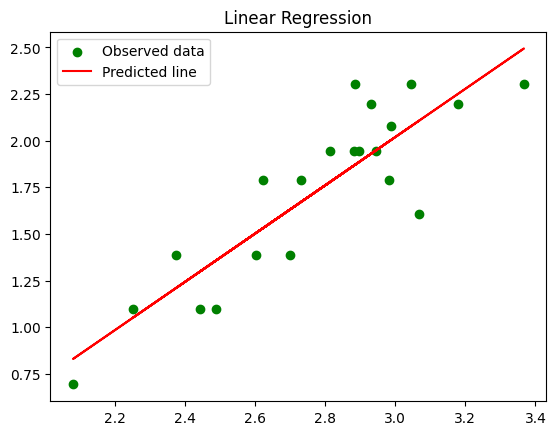

In [44]:
plt.scatter(df.dt_log,df.st_log, color = 'green')
plt.plot(df.dt_log,pred4,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

##  Model4 has the best value of R2